#**Introduction to Deep Learning with Keras Workshop**
*Tutorial Session of the International Conference on Contemporary Issues In Data Science (CiDaS)* - 5, 6 May 2019

Lecturer: Hadi Abdi Khojasteh

hkhojasteh [at] iasbs.ac.ir</br>
https://github.com/hkhojasteh/Personal-Blog

#Introduction to Convolutionl Neural Networks - CNN

In [0]:
import cv2
import numpy as np
from scipy import io

def load_data(training_sample_size=1000, test_sample_size=200, size=5):
    #load dataset
    trs = training_sample_size
    tes = test_sample_size
    dataset = io.loadmat('./dataset/Data_hoda_full.mat')

    #test and training set
    X_train_orginal = np.squeeze(dataset['Data'][:trs])
    y_train = np.squeeze(dataset['labels'][:trs])
    X_test_original = np.squeeze(dataset['Data'][trs:trs+tes])
    y_test = np.squeeze(dataset['labels'][trs:trs+tes])

    #resize
    X_train_5by5 = [cv2.resize(img, dsize=(size, size)) for img in X_train_orginal]
    X_test_5by_5 = [cv2.resize(img, dsize=(size, size)) for img in X_test_original]
    #reshape
    X_train = [x.reshape(size*size) for x in X_train_5by5]
    X_test = [x.reshape(size*size) for x in X_test_5by_5]
    
    return X_train, y_train, X_test, y_test

Flattens the input before first dense layer. It's does not affect the batch size.

In [4]:
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import numpy as np
import matplotlib.pyplot as plt

model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

##CNN on hadrwittern datasets and its training

Images are flatted as 784 indexes (28 x 28). Images channel are 1 (grayscale).

In [8]:
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(100)  # for reproducibility

x_train_original, y_train_original, x_test_original, y_test_original = load_hoda(
                                                                        training_sample_size=3500,
                                                                        test_sample_size=400,size=28)

#Preprocess input data
''' input data in numpy array format'''
x_train = np.array(x_train_original)
x_test = np.array(x_test_original)
''' normalize our data values to the range [0, 1]'''
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

#Reshape to original image shape (n x 784)  ==> (n x 28 x 28 x 1)
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)


#Preprocess class labels
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)


#test and validation set
x_val = x_test[:200]
x_test = x_test[200:]
y_val = y_test[:200]
y_test = y_test[200:]

#Define model architecture
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


#Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


#Fit model on training data
history = model.fit(x_train, y_train,
          epochs=200, batch_size=256, validation_data = (x_val, y_val))



Instructions for updating:
Use tf.cast instead.
Train on 3500 samples, validate on 200 samples
Epoch 1/200
3500/3500 [==============================] - 5s 1ms/step - loss: 2.0205 - acc: 0.3394 - val_loss: 1.3190 - val_acc: 0.6900
Epoch 2/200
3500/3500 [==============================] - 0s 67us/step - loss: 1.2100 - acc: 0.6097 - val_loss: 0.6030 - val_acc: 0.8200
Epoch 3/200
3500/3500 [==============================] - 0s 65us/step - loss: 0.8004 - acc: 0.7403 - val_loss: 0.3487 - val_acc: 0.8850
Epoch 4/200
3500/3500 [==============================] - 0s 62us/step - loss: 0.5789 - acc: 0.8071 - val_loss: 0.2847 - val_acc: 0.9250
Epoch 5/200
3500/3500 [==============================] - 0s 61us/step - loss: 0.4534 - acc: 0.8451 - val_loss: 0.2186 - val_acc: 0.9300
Epoch 6/200
3500/3500 [==============================] - 0s 62us/step - loss: 0.4007 - acc: 0.8683 - val_loss: 0.1982 - val_acc: 0.9400
Epoch 7/200
3500/3500 [==============================] - 0s 62us/step - loss: 0.3302 - acc

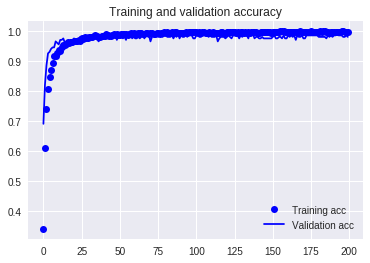

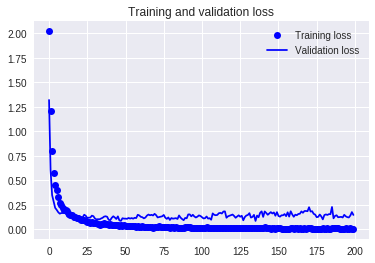

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()